# 作業 : (Kaggle)鐵達尼生存預測 
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察降低偏態的影響

# [作業重點]
- 觀察使用log1p降偏態時, 對於分布與迴歸分數的影響 (In[6], Out[6])
- 修正區塊中的資料問題後, 觀察以box-cox降偏態, 對於分布與迴歸分數的影響 (In[7], Out[7])

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = '/Users/YenLin/Desktop/ML_100/data/'
df_train = pd.read_csv( data_path + 'titanic_train.csv' )
df_test = pd.read_csv( data_path + 'titanic_test.csv' )

train_Y = df_train[ 'Survived' ]
ids = df_test[ 'PassengerId' ]
df_train = df_train.drop( [ 'PassengerId', 'Survived' ] , axis = 1 )
df_test = df_test.drop( [ 'PassengerId' ] , axis = 1 )
df = pd.concat( [ df_train, df_test ] )
df.head( )

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[ num_features ].astype( float )
df = df.fillna(0)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500


In [3]:
# 顯示 Fare 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot( df[ 'Fare' ][ : train_num ] )
plt.show( )

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 640x480 with 1 Axes>

In [4]:
# 計算基礎分數
df_mm = MMEncoder.fit_transform( df )
train_X = df_mm[ : train_num ]
estimator = LogisticRegression( solver = 'liblinear' )
cross_val_score( estimator, train_X, train_Y, cv = 5 ).mean( )

0.7016289882888318

# 作業1 
* 試著在鐵達尼的票價 (Fare) 欄位中使用對數去偏 (log1p) , 結果是否更好?

####  deepcopy( ) : https://morvanzhou.github.io/tutorials/python-basic/basic/13-04-copy/ 
####  How to Fix FutureWarning Messages in scikit-learn : https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


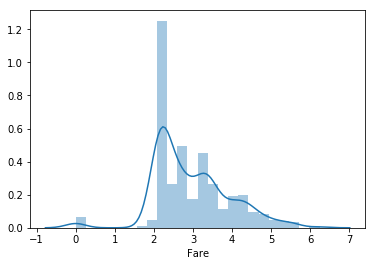

0.7106367963253961

In [5]:
# 將 Fare 取 log1p 後, 看散佈圖, 並計算分數
df_fixed = copy.deepcopy( df )
df_fixed[ 'Fare' ] = np.log1p( df_fixed[ 'Fare' ] )
sns.distplot( df_fixed[ 'Fare' ][ : train_num ] )
plt.show( )

df_fixed = MMEncoder.fit_transform( df_fixed )
train_X = df_fixed[ : train_num ]
estimator = LogisticRegression( solver = 'liblinear' )
cross_val_score(estimator, train_X, train_Y, cv = 5 ).mean( )

# 作業2
* 最後的 boxcox 區塊直接執行會造成錯誤, 起因為輸入值有負值, 請問如何修正後可以使用 boxcox? (Hint : 試圖修正資料)

In [6]:
# 將 Fare 取 boxcox 後, 看散佈圖, 並計算分數 (執行會有 error, 請試圖修正)
from scipy import stats
df_fixed = copy.deepcopy( df )
df_fixed[ 'Fare' ] = stats.boxcox( df_fixed[ 'Fare' ], lmbda = 0.15 )
sns.distplot( df_fixed[ 'Fare' ][ : train_num ] )
plt.show()

df_fixed = MMEncoder.fit_transform( df_fixed )
train_X = df_fixed[ : train_num ]
estimator = LogisticRegression( solver = 'liblinear' )
cross_val_score( estimator, train_X, train_Y, cv = 5 ).mean( )

ValueError: Data must be positive.

### Method 1: 排除小於或等於0的資料
### 查看 Fare 欄位中小於或等於 0 的資料總數

In [7]:
df_fixed = copy.deepcopy( df )

bins = [ -100000, 0,  df_fixed[ 'Fare' ].max( ) ]
df_fixed[ 'Fare_category' ] = pd.cut( df_fixed[ 'Fare' ], bins )
df_fixed[ 'Fare_category' ].value_counts( )


(0.0, 512.329]      1291
(-100000.0, 0.0]      18
Name: Fare_category, dtype: int64

### 排除 Fare 欄位中小於或等於 0 的資料

In [8]:
df_fixed_positive = df_fixed[ (df_fixed[ 'Fare' ] > 0 ) ].drop( 'Fare_category', axis = 1 )

print( '排除後資料總筆數  =  ' + str( df_fixed_positive.shape[0] ) )
df_fixed_positive.head( 10 )

排除後資料總筆數  =  1291


,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500
5,3.0,0.0,0.0,0.0,8.4583
6,1.0,54.0,0.0,0.0,51.8625
7,3.0,2.0,3.0,1.0,21.0750
8,3.0,27.0,0.0,2.0,11.1333
9,2.0,14.0,1.0,0.0,30.0708


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


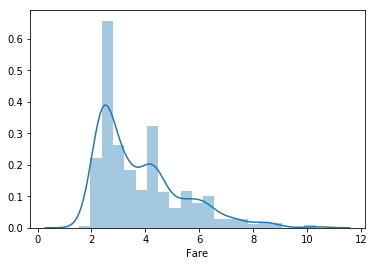

0.6105405833844897

In [9]:
df_fixed_positive[ 'Fare' ] = stats.boxcox( df_fixed_positive[ 'Fare' ], lmbda = 0.15 )
sns.distplot( df_fixed_positive[ 'Fare' ][ : train_num ] )
plt.show()

df_fixed_positive = MMEncoder.fit_transform( df_fixed_positive )
train_X = df_fixed_positive[ : train_num ]
estimator = LogisticRegression( solver = 'liblinear' )
cross_val_score( estimator, train_X, train_Y, cv = 5 ).mean( )

### Method 2 : 限制資料範圍

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


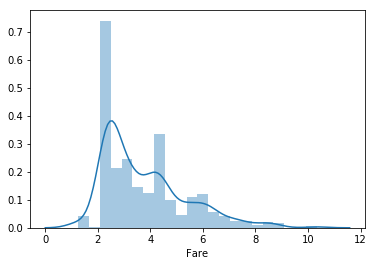

0.7061234412386467

In [10]:
df_fixed = copy.deepcopy( df )

positive_min = df_fixed[ (df_fixed[ 'Fare' ] > 0) ][ 'Fare' ].min( )  # Fare 欄位中最小的正數
df_fixed[ 'Fare' ] = df_fixed[ 'Fare' ].clip( positive_min, df_fixed[ 'Fare' ].max( ) )
df_fixed[ 'Fare' ] = stats.boxcox( df_fixed[ 'Fare' ], lmbda = 0.15 )
sns.distplot( df_fixed[ 'Fare' ][ : train_num ] )
plt.show()

df_fixed = MMEncoder.fit_transform( df_fixed )
train_X = df_fixed[ : train_num ]
estimator = LogisticRegression( solver = 'liblinear' )
cross_val_score( estimator, train_X, train_Y, cv = 5 ).mean( )